In [6]:
# fmt:off
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import the function from the data_processing module
from data_processing import load_train_and_test_data
# fmt:on

# Load data
train_data, test_data = load_train_and_test_data()

# IDA: inspect data
print("Train Data:")
print(train_data.head())
print()
print("Test Data:")
print(test_data.head())

Train Data:
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

Test Data:
             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0       

In [7]:
# IDA: check data types
print("Train Data:")
print(train_data.dtypes)
print()
print("Test Data:")
print(test_data.dtypes)

Train Data:
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

Test Data:
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object


In [16]:
# IDA: calculate number of unique values for integer type numerical features
unique_counts = train_data.select_dtypes(
    include=['int64']).nunique()

print(unique_counts)

season          4
holiday         2
workingday      2
weather         4
humidity       89
casual        309
registered    731
count         822
dtype: int64


In [20]:
# Features with less than 5 unique values
low_unique_features = unique_counts[unique_counts < 5]
for feature in low_unique_features.index:
    print(f"\nValue counts for feature '{feature}':")
    print(train_data[feature].value_counts())


Values for feature 'season':
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

Values for feature 'holiday':
holiday
0    10575
1      311
Name: count, dtype: int64

Values for feature 'workingday':
workingday
1    7412
0    3474
Name: count, dtype: int64

Values for feature 'weather':
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


In [8]:
# IDA: view train data summary statistics
print(train_data.describe())

                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000 

In [9]:
# IDA: check for missing values
print("Train Data:")
print(train_data.isnull().sum())
print()
print("Test Data:")
print(test_data.isnull().sum())

Train Data:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Test Data:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [10]:
# IDA: check for duplicate rows
print("Train Data:")
print(train_data.duplicated().sum())
print()
print("Test Data:")
print(test_data.duplicated().sum())

Train Data:
0

Test Data:
0


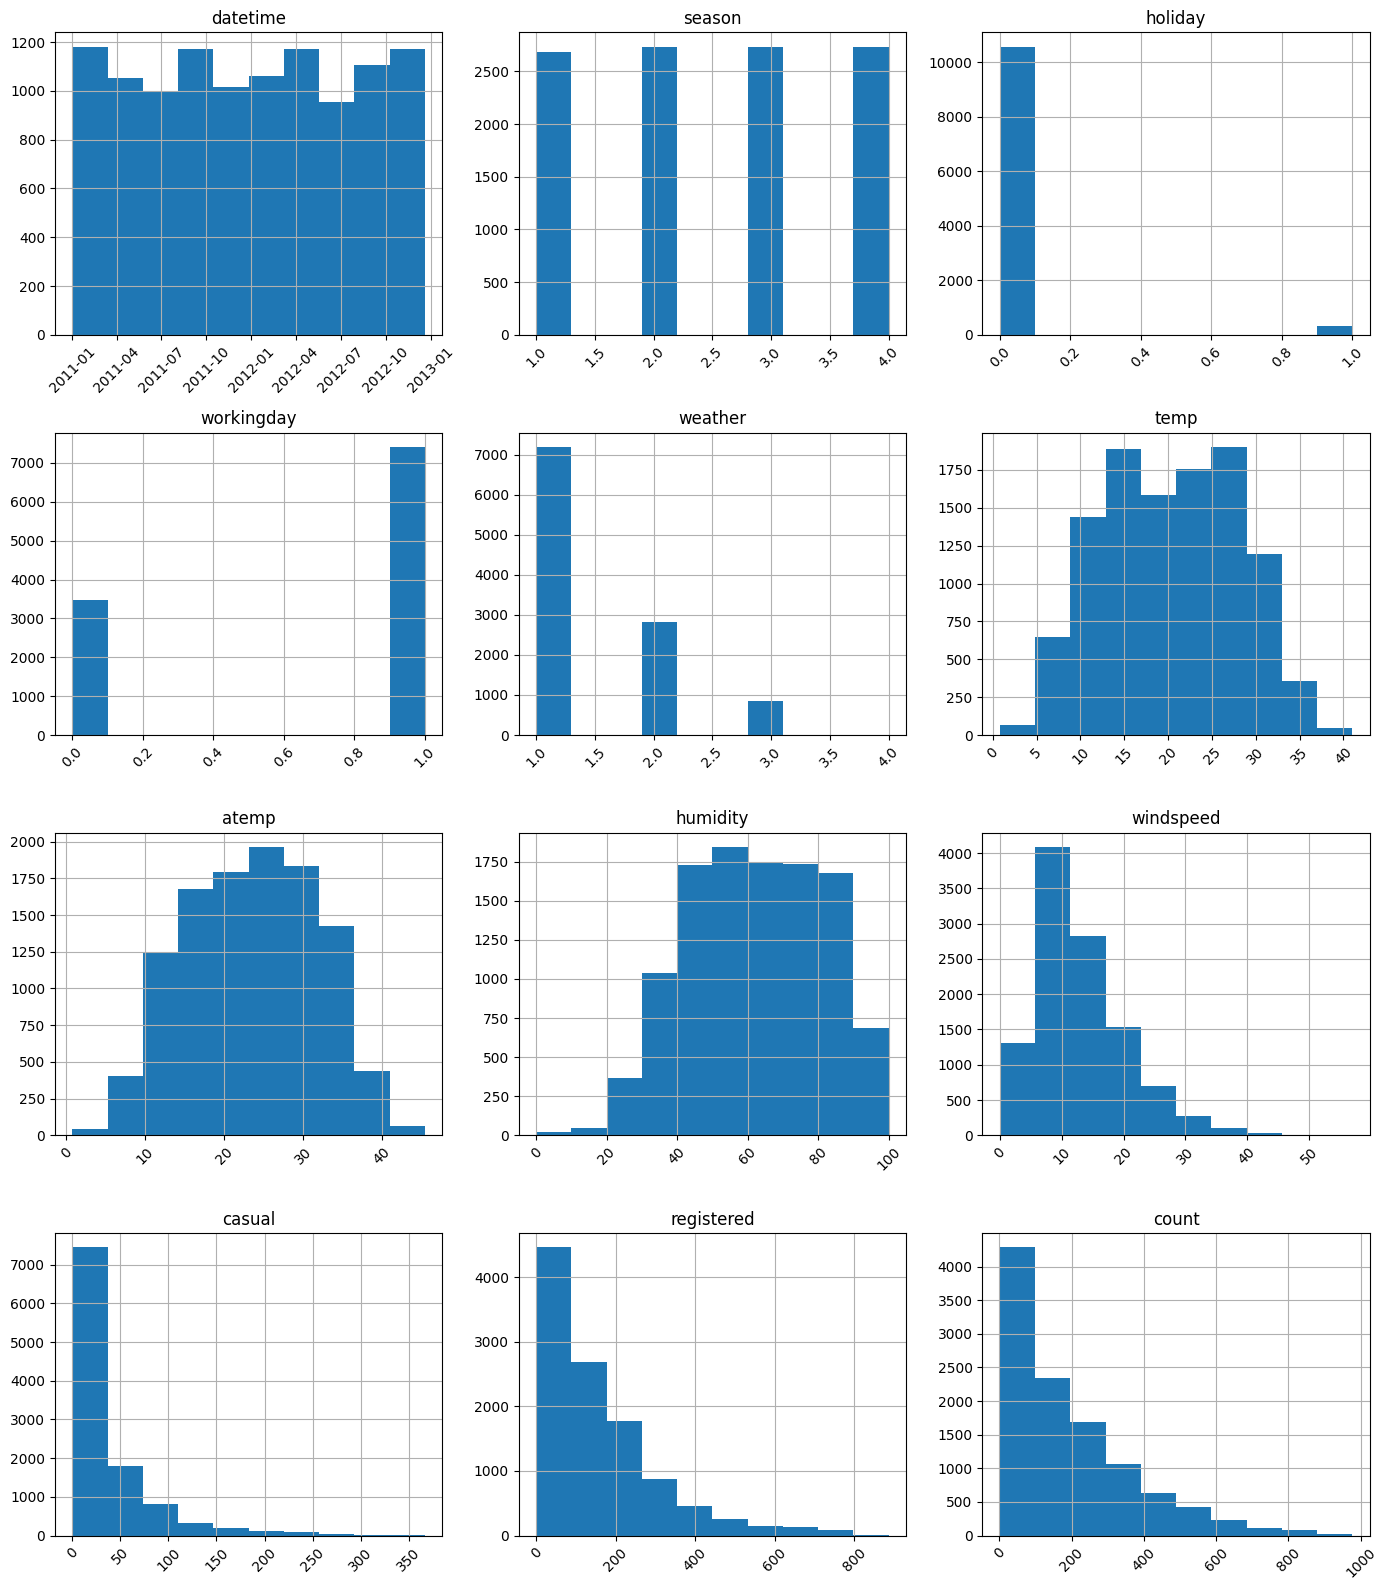

In [11]:
import matplotlib.pyplot as plt

# Univariate analysis: feature distributions
axes = train_data.hist(figsize=(14, 16), layout=(4, 3), sharex=False)

# Rotate x-axis labels for each subplot
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

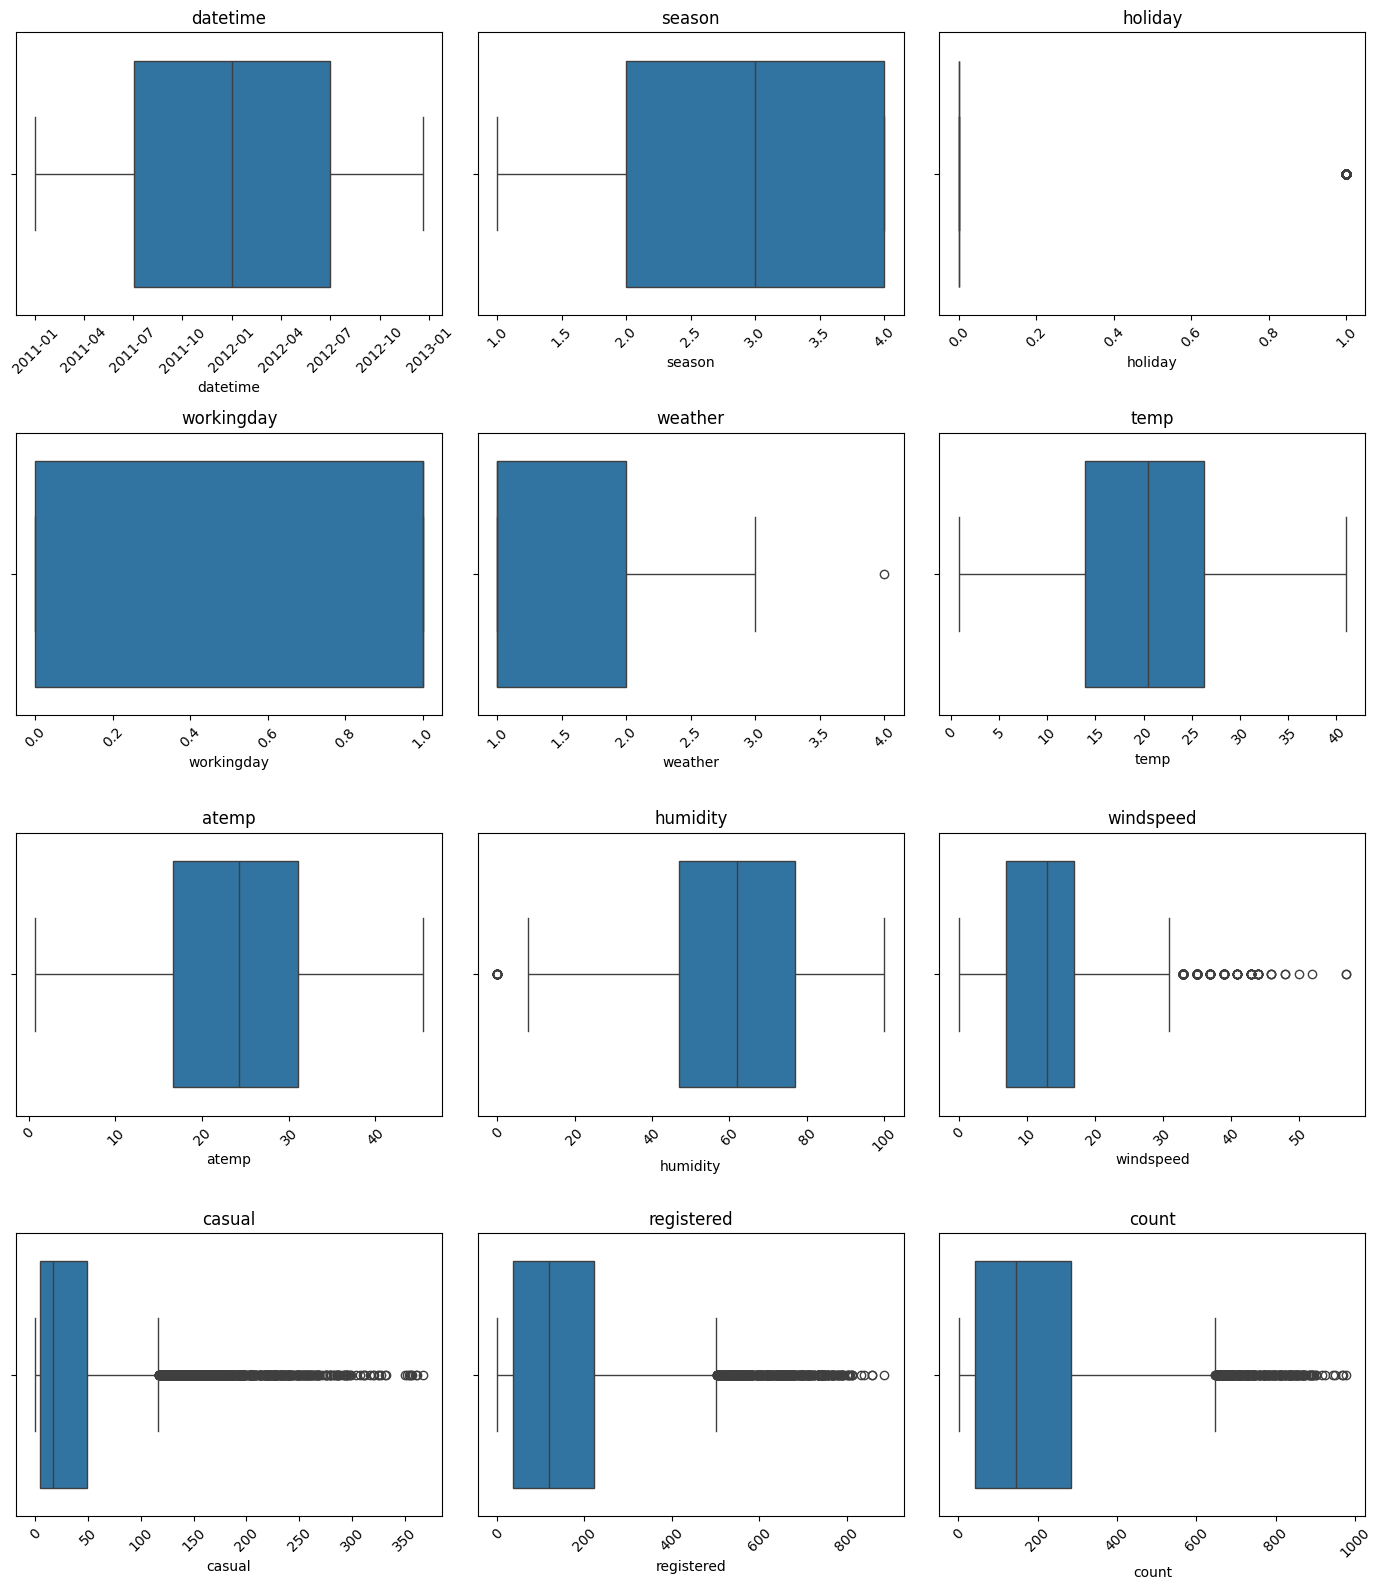

In [13]:
import seaborn as sns

# Univariate analysis: outliers
fig, axes = plt.subplots(4, 3, figsize=(14, 16))
axes = axes.flatten()

for i, feature in enumerate(train_data.columns):
    sns.boxplot(data=train_data, x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()